# Title: Life Expectancy vs GDP
### Author: KlasshDev
### Date: 2023.01.16
### Source: World Health Organization and the World Bank


In [5]:
# Imports
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Initial Data Exploring

In [6]:
# Load data from csv and print head
healthStats = pd.read_csv('all_data.csv')


# Clean column name
healthStats.rename(columns = {'Life expectancy at birth (years)':'Life_Expectancy'}, inplace = True)
print(healthStats.head())

  Country  Year  Life_Expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


In [7]:
# Initial Data Explore
healthStats.info()
healthStats.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


,Year,Life_Expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [28]:
# What Unique info
for column in healthStats:
    print(healthStats[column].unique())

#GDP Info
print(healthStats[healthStats.GDP == healthStats.GDP.max()])
print(healthStats[healthStats.GDP == healthStats.GDP.min()])

# Life expectancy
print(healthStats[healthStats['Life_Expectancy'] 
                  == healthStats['Life_Expectancy'].max()])
print(healthStats[healthStats['Life_Expectancy'] 
                  == healthStats['Life_Expectancy'].min()])

print(healthStats.groupby('Country').agg({'Life_Expectancy': ['mean', 'min', 'max']}))

# Linear Regression line GDP weight on life expectancy
model = sm.OLS.from_formula('Life_Expectancy ~ GDP', data=healthStats)
# Fit the model here:
results = model.fit()
# Print the coefficients here:
print(results.params)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
[77.3 77.8 77.9 78.  78.4 78.9 79.6 79.3 79.1 79.8 79.9 80.1 80.3 80.5
 71.7 72.2 72.7 73.1 73.5 73.9 74.2 74.4 74.5 74.9 75.  75.2 75.4 75.6
 75.8 76.1 78.3 78.5 79.2 80.  80.6 80.9 81.  74.8 75.3 76.  75.7 76.3
 76.6 76.7 76.8 76.9 77.  77.2 77.5 78.1 78.2 78.7 78.8 46.  45.3 44.8
 44.5 44.3 44.6 45.4 46.6 48.2 50.  52.4 54.9 56.6 58.  59.2 60.7]
[7.78609322e+10 7.09799240e+10 6.97368114e+10 7.56434598e+10
 9.92103929e+10 1.22965000e+11 1.54788000e+11 1.73606000e+11
 1.79638000e+11 1.72389000e+11 2.18538000e+11 2.52252000e+11
 2.67122000e+11 2.78384000e+11 2.60990000e+11 2.42518000e+11
 1.21135000e+12 1.33940000e+12 1.47055000e+12 1.66029000e+12
 1.95535000e+12 2.28597000e+12 2.75213000e+12 3.55218000e+12
 4.59821000e+12 5.10995000e+12 6.10062000e+12 7.57255000e+12
 8.56055000e+12 9.60722000e+12 1.04824000e+13 1.10647000e+13
 1.

### Initial Findings:
- Only 96 entries in data source
- From years 2000 - 2015
- Countries: 'Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe'
- Min Life expectency: 44 years
- Max: 81 years
- Min GDP: 4.4 Billion (Zimbabwe 2008)
- Max GDP: 1.8 Trillion (USA 2015)
- Highest age: 81, Germany 2015
- Lowest age: 44.3, Zimbabwe 2004
- Zimbabwe is in rough shape, Mean age is only 50 (from 44.3 to only 60.7)
- In contrast, Germany's mean is 79! (from 78 - 81)
- Positive linear relationship between GDP and Life expectancy.

# Visualizations

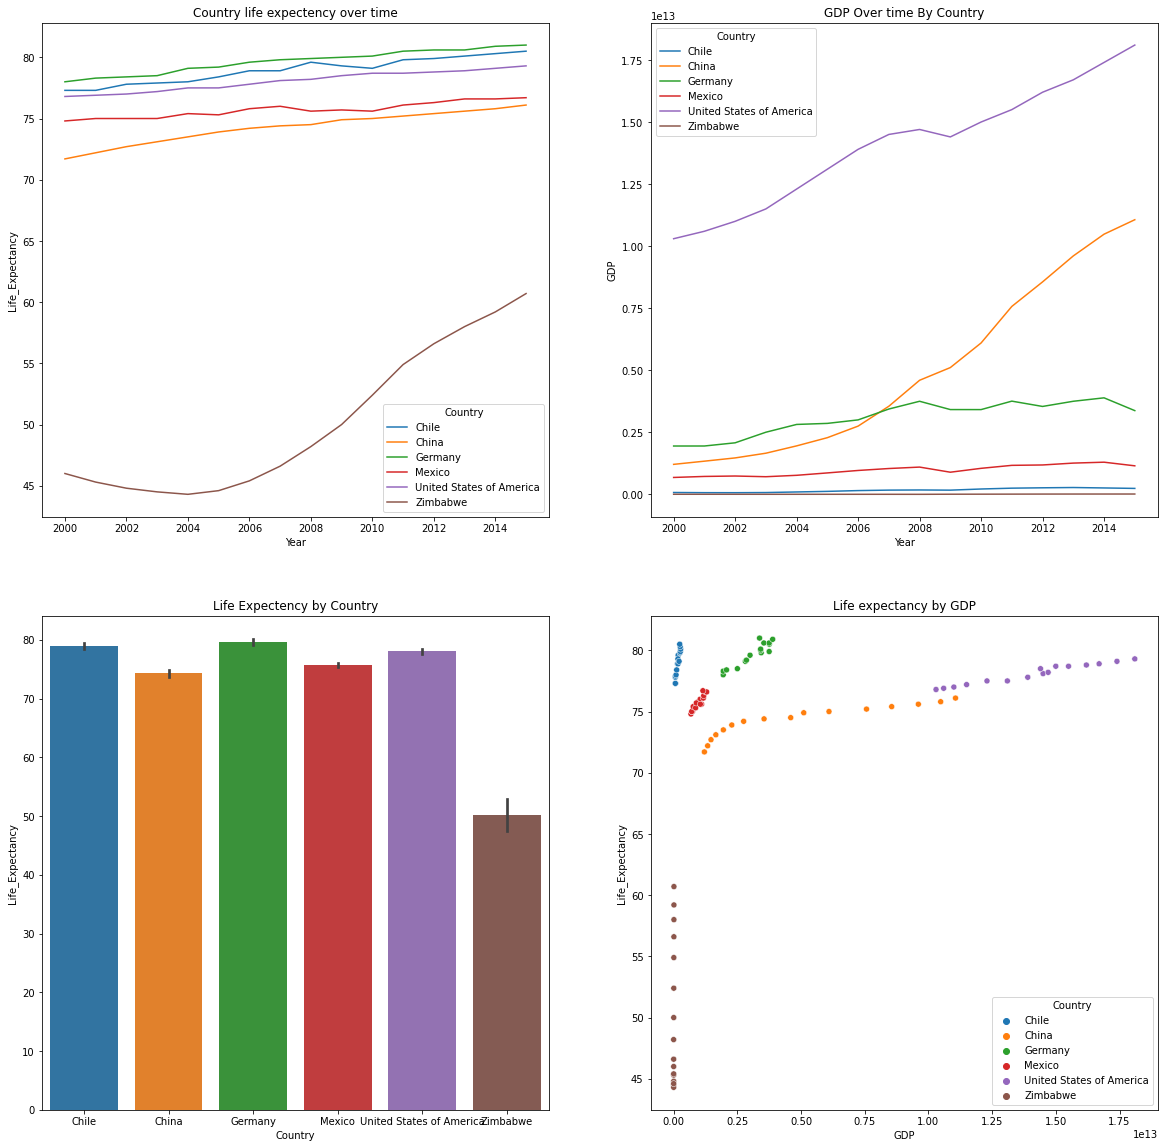

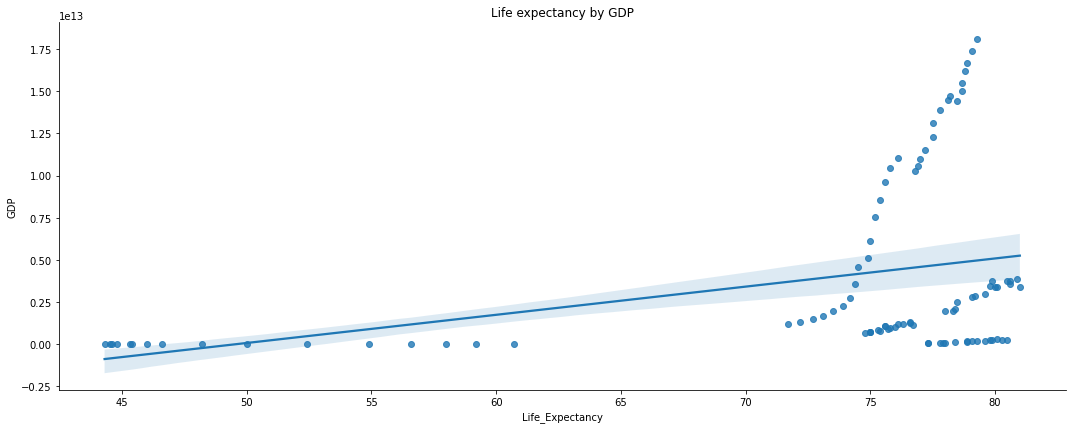

In [26]:
# Average life expectancy by country over time
plt.figure(figsize=(20,20))
ax1 = plt.subplot(2,2,1)
sns.lineplot(x='Year', y='Life_Expectancy', hue='Country', data=healthStats)
plt.title('Country life expectency over time')



# Barplot by country
ax2 = plt.subplot(2,2,3)
sns.barplot(x='Country', y='Life_Expectancy', data=healthStats)
plt.title('Life Expectency by Country')



# Plot GDP and life expectancy
ax3 = plt.subplot(2,2,4)
sns.scatterplot(x=healthStats.GDP, y=healthStats.Life_Expectancy, hue=healthStats.Country)
plt.title('Life expectancy by GDP')



# Plot GDP over years by Country
ax4 = plt.subplot(2,2,2)
sns.lineplot(x='Year', y='GDP', hue='Country', data=healthStats)
plt.title('GDP Over time By Country')
plt.show()


# Plot Life Expectancy vs GDP with Linear Regression Line
sns.lmplot(x='Life_Expectancy', y='GDP', data=healthStats, height=6, aspect=2.5)
plt.title('Life expectancy by GDP')
plt.show()


# Conclusions
- While Zimbabwe is starting behind on both GDP and Life Expectency, they've made the biggest improvement. 
- China (And USA) has seen a spike in GDP, not as dramatic of boost in life expectation
- There is a positive corrolation between GDP and life expectancy.

